In [ ]:
import warnings
warnings.filterwarnings('ignore')
# 깔끔한 출력을 위해

In [ ]:
!pip install plotnine==0.5.0
!pip install --upgrade pandas==0.23.4
# pandas 업데이터 때문에 plotnine 버전 맞춰줘야 하는 부분 (오류 때문)

In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype# 그래프 정렬
import numpy as np

In [ ]:
print(pd.__version__)
print(np.__version__)

In [ ]:
from plotnine import *

In [ ]:
# gauth 인증, G드라이브 연결
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# 파일 링크
#https://drive.google.com/file/d/1E4LfdxSCWTR1f35-bmyseegpkivMzJAO/view?usp=sharing
# = 이후의 값이 id값
#url = 'https://drive.google.com/file/d/1E4LfdxSCWTR1f35-bmyseegpkivMzJAO/view?usp=sharing'
#id = url.split('=')[1]
#id

In [ ]:
# 드라이브 마운트
data = pd.read_csv('/content/drive/MyDrive/국민청원분석/petition.csv')
data.head()

In [ ]:
data.shape
# 377756개의 국민청원

In [ ]:
data.columns

In [ ]:
# article_id를 index로 하려면
data_1 = pd.read_csv('/content/drive/MyDrive/국민청원분석/petition.csv', index_col = 0 )

# article_id 1 ~ 20은 어디에??

In [ ]:
data.tail()

In [ ]:
# 2019년이 마지막인 data
data.answered.unique()
# answered 는 국민청원 답변 받았는지 여루

In [ ]:
data.category.unique()
# 아래와 같은 분야로 분류

In [ ]:
data.info()

In [ ]:
# 위에서 start, end 는 datatime 타입인데, object 형이라서, 이를 datatime 형으로 변환하려면
# 처음에 데이터 불러올때 param 으로 
data_2 = pd.read_csv('/content/drive/MyDrive/국민청원분석/petition.csv', index_col = 0, parse_dates = ['start', 'end'])
data_2.info()

In [ ]:
data.describe()

In [ ]:
# 도움말
#data.describe?

In [ ]:
data['votes'].mean()

In [ ]:
data.votes.max()

In [ ]:
data.describe(include = [np.object])

In [ ]:
# 가장 많이 등장한 (도배된) 3018개의 청원이 올라온 '이명박 출국금지' title의 청원

In [ ]:
data.isnull().sum()

In [ ]:
# content 1개 빠진 것은 크롤링 과정중 빠진 부분

In [ ]:
# 답변을 해줘야할 , 답변 대상 청원 컬럼 재구축

In [ ]:
data['answer'] = (data['votes'] >= 200000) == 1
data.shape

In [ ]:
data.tail(3)

In [ ]:
# 청원 기간 컬럼 생성
# 하려면 end, start를 datetime으로 하는게 필요
data = data_2.copy()

# answered 컬럼
data['answer'] = (data['answered'] == 1 ) == 1

In [ ]:
data.head(2)

In [ ]:
data['duration'] = data['end'] - data['start']

In [ ]:
data.head(2)

In [ ]:
data['duration'].value_counts()

In [ ]:
# 30일만에 답변받은 청원도 있고, 90일만에 받은 것도 있다.

In [ ]:
data.loc[ (data['duration'] == '90 days') & (data['answer'] == 1) ]

In [ ]:
data_60_t = data.loc[ (data['duration'] == '60 days') & (data['answer'] == 1) ]
data_60_t

In [ ]:
data_30_t = data.loc[(data['duration'] == '30 days') & (data['answer'] == 1)]
data_30_t.head(10)

In [ ]:
data_30_t.shape

In [ ]:
# 어느 카테고리의 청원이 가장 많았는가?
category = pd.DataFrame(data['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

In [ ]:
# 정치개혁 카테고리에서 청원이 가장 많음

In [ ]:
# 청원이 가장 많이 들어온 날은 언제인가
most_in_day = pd.DataFrame(data['start'].value_counts()).reset_index()
most_in_day.columns = ['start', 'counts']
most_in_day = most_in_day.sort_values('counts', ascending = False)
print('청원 집계 : {}일'.format(most_in_day.shape[0]))
most_in_day

In [ ]:
# 2017년 11월 11일에 무슨일이 있었던걸까..

In [ ]:
data_unique = pd.pivot_table(data, index = ['category'], aggfunc = np.sum)
data_best = data_unique.sort_values(by = 'votes', ascending = False).reset_index()
data_best

In [ ]:
data_start = pd.pivot_table(data, index = ['start'], aggfunc = np.sum)
votes_df = data_start.sort_values(by = 'votes', ascending = False)
votes_df.loc[data_start['votes'] > 350000]

In [ ]:
# 2018년 10월 17일 투표 100만건을 넘긴 청원 - 악명높음 강서구 피시방 살인사건 
data_181017 = data.loc[data['start'] == '2018-10-17'].sort_values(by = 'votes', ascending = False)
data_181017.head(5)

## 청원에 대한 투표를 가장 많이 받은 날  vs  국민청원을 가장 많이 받은 날

In [ ]:
# 투표를 가장 많이 받은 날
votes_df = votes_df.reset_index()
votes_df.head()

In [ ]:
# 청원을 가장 많이 받은 날을 추가
hottest_day_df = most_in_day.merge(votes_df, on = 'start', how = 'left')
hottest_day_df.sort_values('votes', ascending = False)[:5]# 내림차순

## 답변 대상 청원
- 20만 이상의 투표수를 얻으면 답변을 받을 수 있는 대상이 되는 점 이용

In [ ]:
answered_to = data.loc[data['votes'] >= 200000]
print('답변 대상 청원 : {}건'.format(answered_to.shape[0]))

In [ ]:
answered_to.head()

In [ ]:
answered_to.tail()

In [ ]:
# 답변 대상 청원 투표수순으로 정렬
answered_to_sorted_votes = answered_to.sort_values(by = 'votes', ascending = False)#내림차순
answered_to_sorted_votes.head(10)

### 시각화 - plotnine

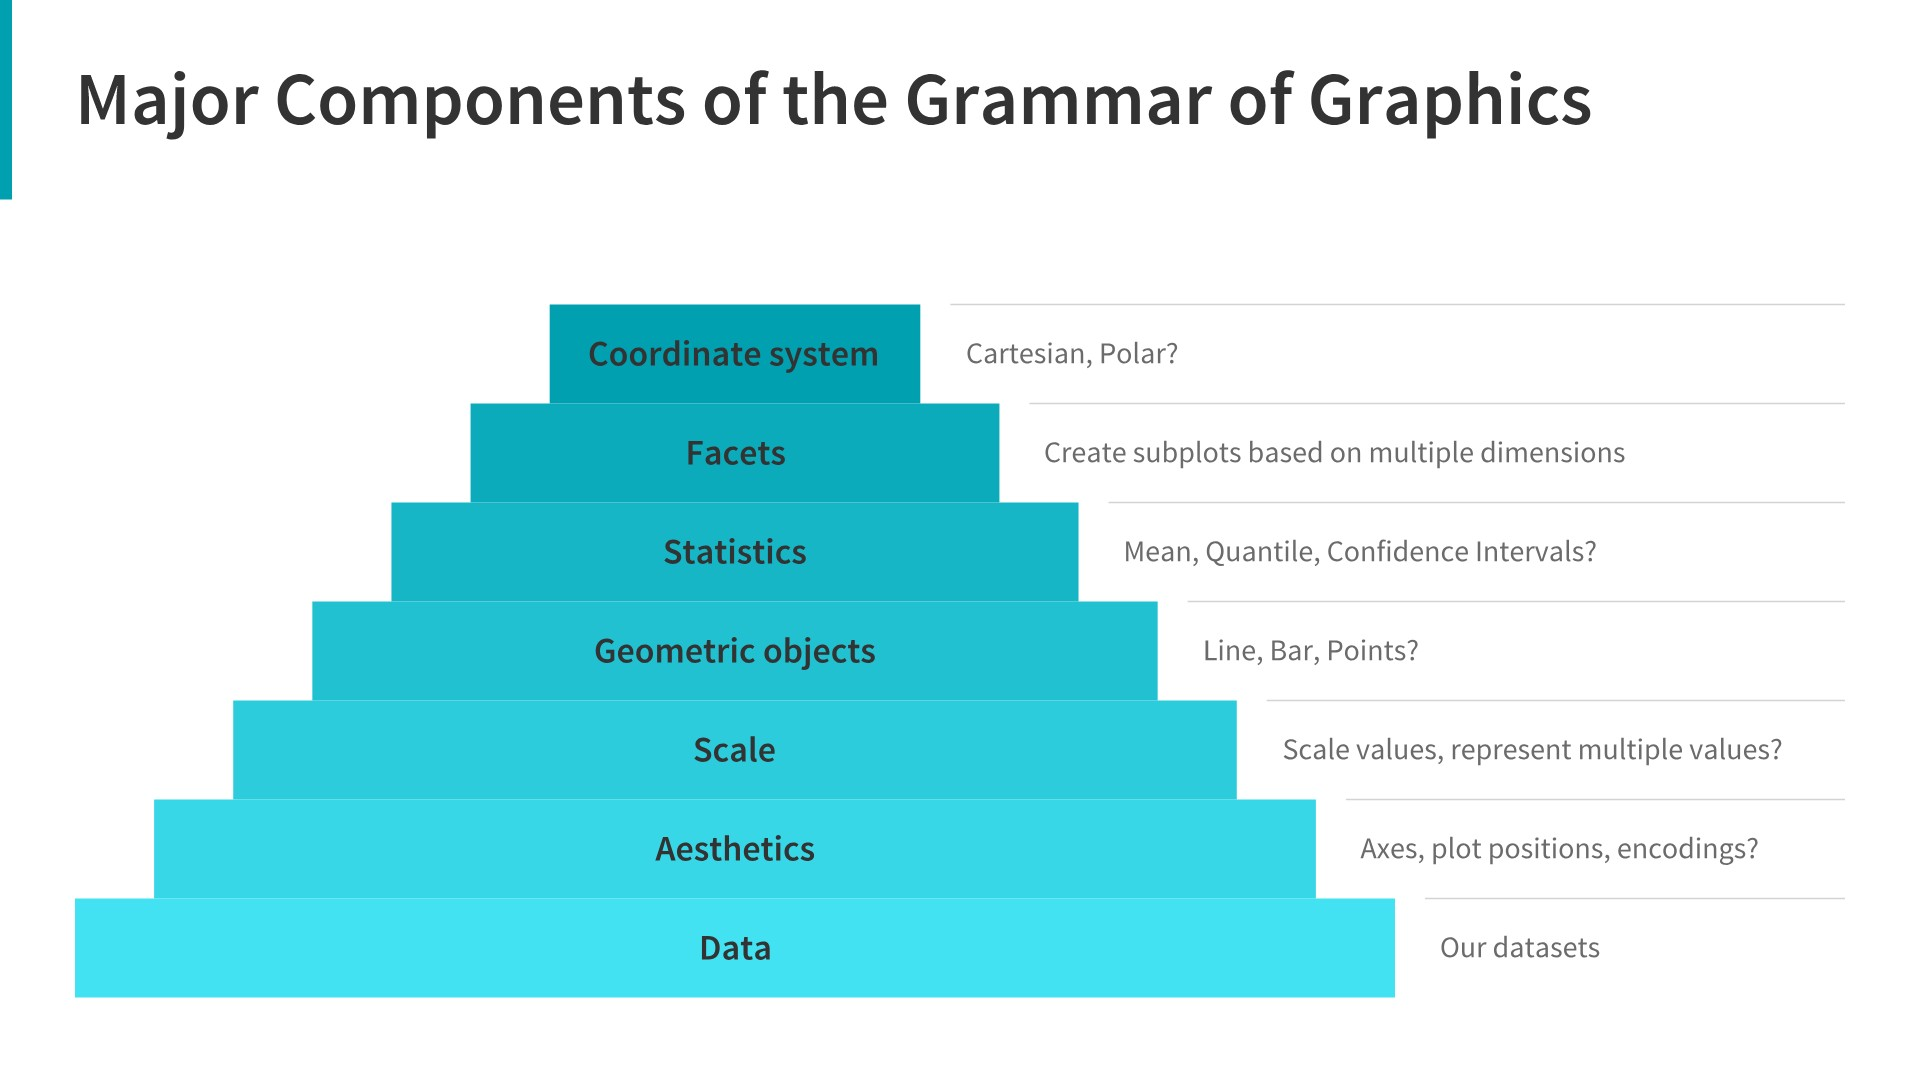

In [ ]:
# 한글 폰트 설치
# 네이버의 나눔 폰트 사용
# 검색해서 다운로드 후 G드라이브에 업로드해서 마운트로 가져오기

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/content/drive/MyDrive/Korean_Fonts/Nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [ ]:
# 글씨가 겹쳐보이지 않도록 rotation(회전)도 추가
(ggplot(data)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [ ]:
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

In [ ]:
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['font.size'] = 25

In [ ]:
# 글씨가 겹쳐보이지 않도록 rotation(회전)도 추가
(ggplot(data)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [ ]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

In [ ]:
import matplotlib.font_manager as fm

path = 'C:/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path)

In [ ]:
# fontproperties=fontprop
(ggplot(data)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [ ]:
ggplot?

In [ ]:
# fontproperties=fontprop
(ggplot(data)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family=fontprop),
        axis_text_x=element_text(rotation=60))
)